DZ_Light. Занятие 12. Генетические алг. Часть 2. Поезда.

3)Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:
Поезда - 1, 12, 72, 4, 55, 1
Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

4)Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):
Поезда - 10, 10, 10, 12, 12, 12
Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6


Грузим необходимые библиотеки

In [0]:
import random as random                           # Импортируем библиотку генерации случайных значений
import numpy as np                                # Импортируем библиотеку numpy
import pandas as pd                               # пандас для таблиц
import matplotlib.pyplot as plt                   # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors                # Импортируем модуль colors библиотеки matplotlib
%matplotlib inline 

Объявим несколько функций для работы

In [0]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(popul,val,nsurv,reverse):
    newpopul = []                               # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse)         # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv):                      # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i])              # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index])           # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval                       # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(curr_popul, nsurv):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1 
    
    botp1 = curr_popul[indexp1]             # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2]             # Получаем второго бота-родителя по indexp2 
    
    return botp1, botp2                     # Возвращаем 2x полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(botp1, botp2, j):
    pindex = random.random()                # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x                                # Возвращаем значние бота

3)Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам: Поезда - 1, 12, 72, 4, 55, 1 Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

0   164.56   [50, 56, 70, 80, 82, 94, 98, 100, 102, 106, 110, 110, 110, 114, 116, 116, 118, 118, 120, 120]
1   111.68   [28, 30, 38, 46, 48, 50, 52, 54, 56, 60, 70, 74, 74, 76, 78, 78, 80, 82, 84, 84]
2   77.52   [16, 28, 28, 30, 30, 34, 38, 38, 38, 38, 38, 40, 42, 42, 44, 44, 46, 46, 46, 48]
3   60.22   [14, 16, 18, 20, 24, 26, 26, 28, 28, 28, 28, 30, 30, 30, 30, 30, 32, 34, 34, 36]
4   56.5   [14, 14, 16, 16, 16, 18, 20, 20, 22, 22, 24, 26, 26, 26, 26, 28, 28, 28, 28, 28]
5   53.48   [12, 14, 14, 14, 14, 16, 16, 16, 16, 18, 18, 20, 20, 20, 20, 20, 22, 22, 22, 22]
6   49.14   [10, 12, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 20]
7   48.6   [4, 8, 10, 10, 12, 12, 12, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16]
8   50.5   [4, 8, 10, 10, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16]
9   47.92   [4, 8, 10, 10, 10, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16]
10   47.82   [4, 8, 8, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 1

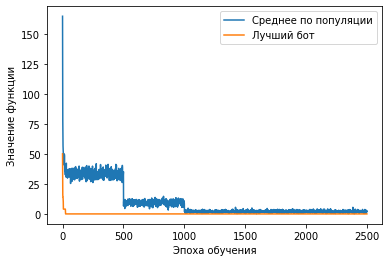

In [0]:
n = 100                                         # Общее число ботов
nsurv = 20                                      # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                                  # Количество новых (столько новых ботов создается)
epohs = 2500                                    # количество эпох
mut = 0.2                                       # коэфициент мутаций

train = np.array([1, 12, 72, 4, 55, 1]) # Вместимость каждого поезда  1, 12, 72, 4, 55, 1

# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов ) 
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8])

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                         # Количество поездов

popul = []                                      # Двумерный массив популяции, размерностью [n, l].
val = []                                        # Одномерный массив значений этих ботов

plotmeanval = []                                # сюда будут заносится значения для графика по среднему значению
plotminval = []                                 # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n):                              # Проходим по всей длине популяции
    popul.append([])                            # Создаем пустого бота
    for j in range(l):                          # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):                         # Проходим по всем эпохам
    if (it == 500):                             # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.05   
    if (it == 1000):                            # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.01  
    val = []                                    # Создаем пустой список для значений ботов

    for i in range(n):                              # Проходим по всей популяции
        bot = popul[i]                              # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])      # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                  # Проходим по всей длине бота 8раз
            trainfill[bot[j]] += size[j]                    # Увеличиваем заполненность bot[j]-го поезда на size[j]          
            f = 0                                           # Обнуляем ошибку i-го бота 
        
        for t in range(trains):                             # Проходим по всем поездам
                               # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
                               # и вместимостью, который посчитал бот /надо заполнить поезда максимально равномерно
            f += abs( train[t] - trainfill[t] ) 

        val.append(f)                                       # Добавляем в val значение ошибки для i-го бота    

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)             # Получаем новую популяцию и сортированный список значений
    print(it, " ", sum(val) / len(val), " ", sval[0:20])            # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                         # Добавляем среднее значение в список
    plotminval.append(sval[0])                                      # Добавляем минимальное значение в список
    
    for i in range(nnew):                                             # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)                    # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                                   # Массив для нового бота
    
        for j in range(l):                                            # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)               # Получаем значение для j-ого компонента бота
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                          # Добавляем новое значение в бота      
        newpopul.append(newbot)                                       # Добавляем бота в новую популяцию    
    popul = newpopul                                                  # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [0]:
# Выводим 10 лучших ботов
for i in range(10):
    print(popul[i])

[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]
[2, 0, 3, 1, 1, 3, 2, 2, 5, 2, 2, 1, 2, 4, 4, 4, 4, 4]


In [0]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)               # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32')       # Массив заполненности поездов
for j in range(l):                                  # Проходим по всей длине бота
    trainfill[bot[j]] += size[j]                    # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill)     # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)        # Выводим реальную вместимость поездов

Значения лучшего бота: [2, 0, 1, 3, 4, 5, 1, 0, 3, 6, 1, 3, 4, 4, 4, 7, 7]
Вместимость поездов по боту: [11 18  5 16  9  3  2 21]
Реальная вместимость поездов: [11 18  6 15  9  3  2 21]


4)Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота): Поезда - 10, 10, 10, 12, 12, 12 Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

0  __   6.574422483679853  __  [1.3527777777777776, 1.6730158730158728, 1.8277777777777777, 1.8865800865800866, 1.9166666666666667, 2.0609890109890108, 2.126190476190476, 2.1916666666666664, 2.2195887445887448, 2.252849927849928, 2.272222222222222, 2.422619047619048, 2.4976190476190476, 2.618627450980392, 2.759969442322383, 2.849206349206349, 2.867063492063492, 2.901984126984127, 3.0519841269841272, 3.05580693815988]
1  __   5.335428027494035  __  [1.3527777777777776, 1.5254689754689754, 1.5583333333333331, 1.6730158730158728, 1.7356643356643358, 1.8277777777777777, 1.8376484626484626, 1.8724969474969475, 1.8865800865800866, 1.9166666666666667, 2.0023310023310024, 2.047619047619048, 2.0609890109890108, 2.126190476190476, 2.1333333333333333, 2.17495004995005, 2.1916666666666664, 2.2195887445887448, 2.252849927849928, 2.272222222222222]
2  __   4.4111384143032755  __  [1.2845959595959597, 1.3527777777777776, 1.3933982683982684, 1.415873015873016, 1.4984848484848485, 1.5254689754689754, 1

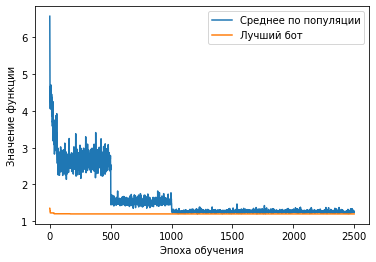

In [11]:
n = 100                                         # Общее число ботов
nsurv = 20                                      # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                                  # Количество новых (столько новых ботов создается)
epohs = 2500                                    # количество эпох
mut = 0.2                                       # коэфициент мутаций

train = np.array([10, 10, 10, 12, 12, 12]) # Вместимость каждого поезда  10, 10, 10, 12, 12, 12. итого 6 поездов.

# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов ) 
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                         # Количество поездов

popul = []                                      # Двумерный массив популяции, размерностью [n, l].
val = []                                        # Одномерный массив значений этих ботов

plotmeanval = []                                # сюда будут заносится значения для графика по среднему значению
plotminval = []                                 # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n):                              # Проходим по всей длине популяции
    popul.append([])                            # Создаем пустого бота
    for j in range(l):                          # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):                         # Проходим по всем эпохам
    if (it == 500):                             # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.05   
    if (it == 1000):                            # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.01  
    val = []                                    # Создаем пустой список для значений ботов

    for i in range(n):                              # Проходим по всей популяции
        bot = popul[i]                              # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])      # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                  # Проходим по всей длине бота 8раз
            trainfill[bot[j]] += size[j]                    # Увеличиваем заполненность bot[j]-го поезда на size[j]          
            f = 0                                           # Обнуляем ошибку i-го бота 
        
        for t in range(trains):                             # Проходим по всем поездам
                               # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
                               # и вместимостью, который посчитал бот /надо заполнить поезда максимально равномерно
            f += abs((train[t] - trainfill[t])/(trainfill[t]+1))    # ф-ция оценки качества бота

        val.append(f)                                       # Добавляем в val значение ошибки для i-го бота    

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)             # Получаем новую популяцию и сортированный список значений
    print(it, " __  ", sum(val) / len(val), " __ ", sval[0:20])       # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                         # Добавляем среднее значение в список
    plotminval.append(sval[0])                                      # Добавляем минимальное значение в список
    
    for i in range(nnew):                                             # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)                    # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                                   # Массив для нового бота
    
        for j in range(l):                                            # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)               # Получаем значение для j-ого компонента бота
                                          # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                          # Добавляем новое значение в бота      
        newpopul.append(newbot)                                       # Добавляем бота в новую популяцию    
    popul = newpopul                                                  # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [12]:
# Выводим 10 лучших ботов
for i in range(10):
    print(popul[i])

[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
[2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]


In [14]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)               # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32')       # Массив заполненности поездов
for j in range(l):                                  # Проходим по всей длине бота
    trainfill[bot[j]] += size[j]                    # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Заполняемость поездов по боту:', trainfill)     # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)  

Значения лучшего бота: [2, 5, 2, 1, 1, 5, 3, 2, 1, 0, 3, 1, 3, 4, 4, 2, 0, 5]
Заполняемость поездов по боту: [9 9 9 9 9 9]
Реальная вместимость поездов: [10 10 10 12 12 12]


заполняемость поездов по боту одинаковая.